### THÁP ẢNH ###

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

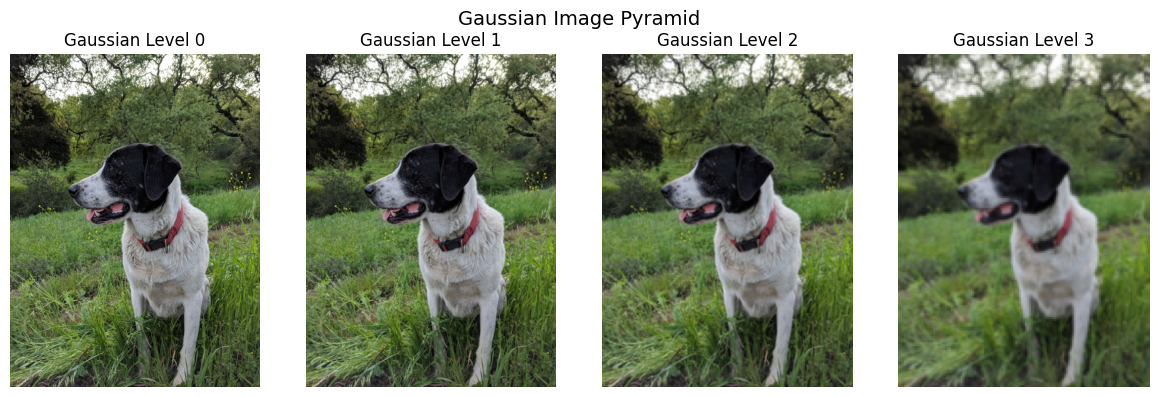

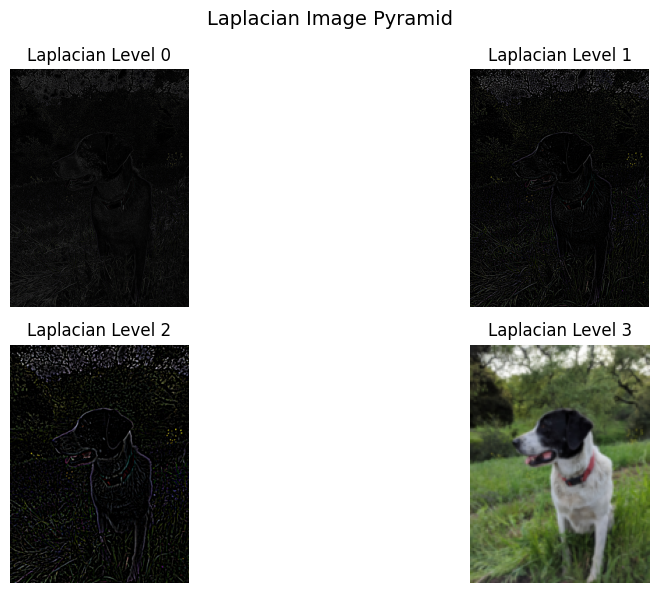

'\nGAUSSIAN PYRAMID:\n- Mỗi tầng: ảnh mờ hơn + nhỏ hơn\n- Dùng cho multi-scale processing\n\nLAPLACIAN PYRAMID:\n- Chứa thông tin chi tiết giữa các tầng\n- Dùng cho:\n  + Image blending\n  + Edge / detail analysis\n  + Image reconstruction\n\n-----------------------------------------\nSO SÁNH NHANH:\n-----------------------------------------\nGaussian Pyramid  → Low-frequency (nền)\nLaplacian Pyramid → High-frequency (chi tiết)\n'

In [ ]:
"""
===========================================================
IMAGE PYRAMID TRONG OPENCV
===========================================================

Image Pyramid (tháp ảnh) là kỹ thuật biểu diễn ảnh ở nhiều
mức độ phân giải khác nhau.

Mục đích:
- Xử lý ảnh đa tỷ lệ (multi-scale)
- Phát hiện đối tượng với kích thước khác nhau
- Nén ảnh
- Ứng dụng trong Computer Vision cổ điển và Deep Learning

-----------------------------------------------------------
CÓ 2 LOẠI IMAGE PYRAMID CHÍNH:
1. Gaussian Pyramid  : giảm kích thước ảnh dần
2. Laplacian Pyramid : biểu diễn chi tiết (edge / high-frequency)
-----------------------------------------------------------
"""
# =========================================================
# 1. ĐỌC ẢNH
# =========================================================
# cv2.imread(path, flag)
# flag = 1 : ảnh màu BGR
img = cv2.imread(r"../data/sammy.jpg")

if img is None:
    print("❌ Không đọc được ảnh")
    exit()

# Chuyển sang RGB để hiển thị đúng màu bằng matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# =========================================================
# 2. GAUSSIAN PYRAMID
# =========================================================
"""
Gaussian Pyramid tạo ra các ảnh có độ phân giải giảm dần
bằng cách:
- Làm mờ ảnh (Gaussian Blur)
- Sau đó giảm kích thước xuống 1/2

-----------------------------------------
HÀM: cv2.pyrDown()
-----------------------------------------

CÚ PHÁP:
dst = cv2.pyrDown(src, dstsize=None, borderType=None)

THAM SỐ:
1. src:
   - Ảnh đầu vào

2. dstsize (ít dùng):
   - Kích thước ảnh đầu ra (width, height)
   - Nếu None → OpenCV tự động giảm còn 1/2

3. borderType:
   - Cách xử lý biên ảnh
   - Mặc định là BORDER_DEFAULT

-----------------------------------------
HÀM: cv2.pyrUp()
-----------------------------------------

Dùng để phóng to ảnh (ngược lại pyrDown)
"""

gaussian_pyramid = [img_rgb]
levels = 4  # số tầng của pyramid

for i in range(1, levels):
    down = cv2.pyrDown(gaussian_pyramid[i - 1])
    gaussian_pyramid.append(down)

# =========================================================
# 3. HIỂN THỊ GAUSSIAN PYRAMID
# =========================================================
plt.figure(figsize=(12, 4))
for i, layer in enumerate(gaussian_pyramid):
    plt.subplot(1, levels, i + 1)
    plt.imshow(layer)
    plt.title(f"Gaussian Level {i}")
    plt.axis("off")

plt.suptitle("Gaussian Image Pyramid", fontsize=14)
plt.tight_layout()
plt.show()

# =========================================================
# 4. LAPLACIAN PYRAMID
# =========================================================
"""
Laplacian Pyramid lưu trữ PHẦN CHI TIẾT (high-frequency)
giữa các tầng Gaussian.

Cách tạo:
- Laplacian_i = Gaussian_i - pyrUp(Gaussian_{i+1})

Ý nghĩa:
- Biểu diễn cạnh, chi tiết ảnh
- Dùng trong blending, image reconstruction
"""

laplacian_pyramid = []

for i in range(levels - 1):
    # Phóng to Gaussian level i+1
    up = cv2.pyrUp(
        gaussian_pyramid[i + 1],
        dstsize=(gaussian_pyramid[i].shape[1],
                 gaussian_pyramid[i].shape[0])
    )
    laplacian = cv2.subtract(gaussian_pyramid[i], up)
    laplacian_pyramid.append(laplacian)

# Level cuối cùng của Laplacian = Gaussian cuối
laplacian_pyramid.append(gaussian_pyramid[-1])

# =========================================================
# 5. HIỂN THỊ LAPLACIAN PYRAMID
# =========================================================
plt.figure(figsize=(12, 6))
for i, layer in enumerate(laplacian_pyramid):
    plt.subplot(2, 2, i + 1)
    # Chuẩn hóa để hiển thị đẹp
    layer_norm = cv2.normalize(
        layer, None, 0, 255, cv2.NORM_MINMAX
    ).astype(np.uint8)

    plt.imshow(layer_norm)
    plt.title(f"Laplacian Level {i}")
    plt.axis("off")

plt.suptitle("Laplacian Image Pyramid", fontsize=14)
plt.tight_layout()
plt.show()


